In [165]:
#Fonte de dados: https://covid.saude.gov.br/
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulação de dados
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Imports análise e modelagem de séries temporais
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
import pandas as pd

In [166]:
df = pd.read_excel(r"C:/Users/Windows/Afonso Lenzi/DataSets/Covid/HIST_PAINEL_COVIDBR_03jun2020.xlsx")

In [167]:
df.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125,1,0,0,0,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125,1,0,0,0,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125,1,0,0,0,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125,2,1,0,0,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-01,10,210147125,2,0,0,0,NaN,NaN


In [168]:
df.tail()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
151274,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,Brasília,2020-05-30,22,3015268,9474,752,162,8,NaN,NaN
151275,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,Brasília,2020-05-31,23,3015268,9780,306,170,8,NaN,NaN
151276,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,Brasília,2020-06-01,23,3015268,10510,730,171,1,NaN,NaN
151277,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,Brasília,2020-06-02,23,3015268,11256,746,177,6,NaN,NaN
151278,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,Brasília,2020-06-03,23,3015268,12020,764,191,14,NaN,NaN


In [175]:
#separar em alguns  subsets para análises

df_estados = df[df['regiao']!='Brasil']
df_Brasil = df[df['regiao']=='Brasil']
df_jgs = df[df['codmun']== 420890]

In [176]:
df_jgs.dtypes

regiao                    object
estado                    object
municipio                 object
coduf                      int64
codmun                   float64
codRegiaoSaude           float64
nomeRegiaoSaude           object
data                      object
semanaEpi                  int64
populacaoTCU2019          object
casosAcumulado             int64
casosNovos                 int64
obitosAcumulado            int64
obitosNovos                int64
Recuperadosnovos         float64
emAcompanhamentoNovos    float64
dtype: object

In [178]:
#convertendo a data para datetime
df_jgs['data'] = pd.to_datetime(df_jgs['data'], format = '%Y-%m')

In [179]:
df_jgs.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
127091,Sul,SC,Jaraguá do Sul,42,420890.0,42011.0,Nordeste,2020-03-28,13,177697,2,0,0,0,NaN,NaN
127092,Sul,SC,Jaraguá do Sul,42,420890.0,42011.0,Nordeste,2020-03-29,14,177697,2,0,0,0,NaN,NaN
127093,Sul,SC,Jaraguá do Sul,42,420890.0,42011.0,Nordeste,2020-03-30,14,177697,2,0,0,0,NaN,NaN
127094,Sul,SC,Jaraguá do Sul,42,420890.0,42011.0,Nordeste,2020-03-31,14,177697,3,1,0,0,NaN,NaN
127095,Sul,SC,Jaraguá do Sul,42,420890.0,42011.0,Nordeste,2020-04-01,14,177697,3,0,0,0,NaN,NaN


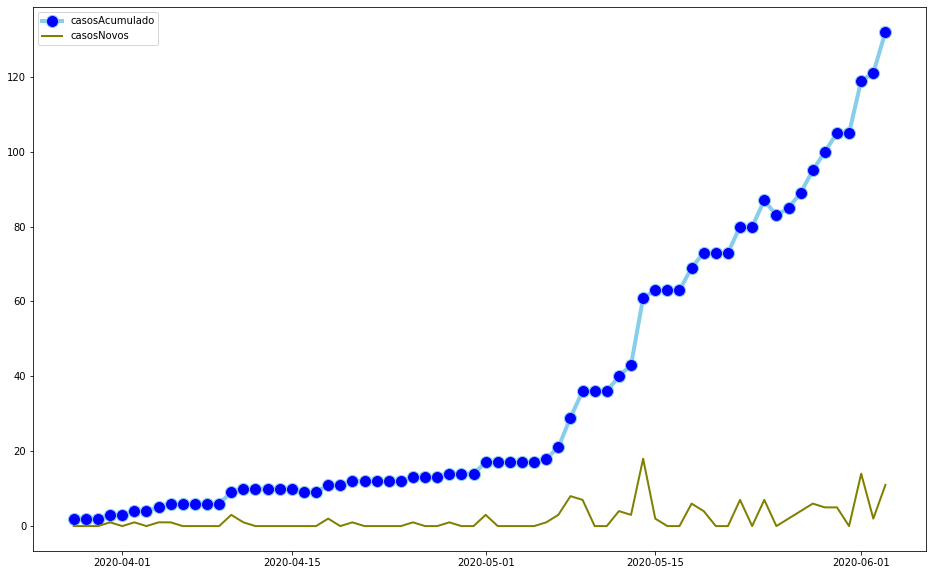

In [180]:
# gráfico comparando casos novos e acumulados
plt.plot( 'data', 'casosAcumulado', data=df_jgs, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'data', 'casosNovos', data=df_jgs, marker='', color='olive', linewidth=2)

plt.legend()

In [181]:
# Vamos transformar a coluna de data no índice do conjunto de dados. Isso vai facilitar nosso trabalho mais a frente.
df_jgs_serie =  df_jlle.set_index('data')


In [182]:
df_jgs_serie.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
data,,,,,,,,,,,,,,,
2020-03-28,Sul,SC,Jaraguá do Sul,42,420890.0,42011.0,Nordeste,13,177697,2,0,0,0,NaN,NaN
2020-03-29,Sul,SC,Jaraguá do Sul,42,420890.0,42011.0,Nordeste,14,177697,2,0,0,0,NaN,NaN
2020-03-30,Sul,SC,Jaraguá do Sul,42,420890.0,42011.0,Nordeste,14,177697,2,0,0,0,NaN,NaN
2020-03-31,Sul,SC,Jaraguá do Sul,42,420890.0,42011.0,Nordeste,14,177697,3,1,0,0,NaN,NaN
2020-04-01,Sul,SC,Jaraguá do Sul,42,420890.0,42011.0,Nordeste,14,177697,3,0,0,0,NaN,NaN


In [183]:
df_jgs_serie.dtypes

regiao                    object
estado                    object
municipio                 object
coduf                      int64
codmun                   float64
codRegiaoSaude           float64
nomeRegiaoSaude           object
semanaEpi                  int64
populacaoTCU2019          object
casosAcumulado             int64
casosNovos                 int64
obitosAcumulado            int64
obitosNovos                int64
Recuperadosnovos         float64
emAcompanhamentoNovos    float64
dtype: object

In [184]:
# Será que algum valor nulo está presente nos dados?
df_jgs_serie.isnull().sum()

regiao                    0
estado                    0
municipio                 0
coduf                     0
codmun                    0
codRegiaoSaude            0
nomeRegiaoSaude           0
semanaEpi                 0
populacaoTCU2019          0
casosAcumulado            0
casosNovos                0
obitosAcumulado           0
obitosNovos               0
Recuperadosnovos         68
emAcompanhamentoNovos    68
dtype: int64

In [185]:
df_jgs_serie.describe()

,coduf,codmun,codRegiaoSaude,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
count,68.0,68.0,68.0,68.000000,68.000000,68.000000,68.000000,68.000000,0.0,0.0
mean,42.0,420890.0,42011.0,18.220588,36.147059,1.985294,0.823529,0.029412,NaN,NaN
std,0.0,0.0,0.0,2.843403,36.790356,3.487687,0.913272,0.170214,NaN,NaN
min,42.0,420890.0,42011.0,13.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,42.0,420890.0,42011.0,16.000000,10.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,42.0,420890.0,42011.0,18.000000,15.500000,0.000000,0.000000,0.000000,NaN,NaN
75%,42.0,420890.0,42011.0,21.000000,64.500000,3.000000,2.000000,0.000000,NaN,NaN
max,42.0,420890.0,42011.0,23.000000,132.000000,18.000000,2.000000,1.000000,NaN,NaN


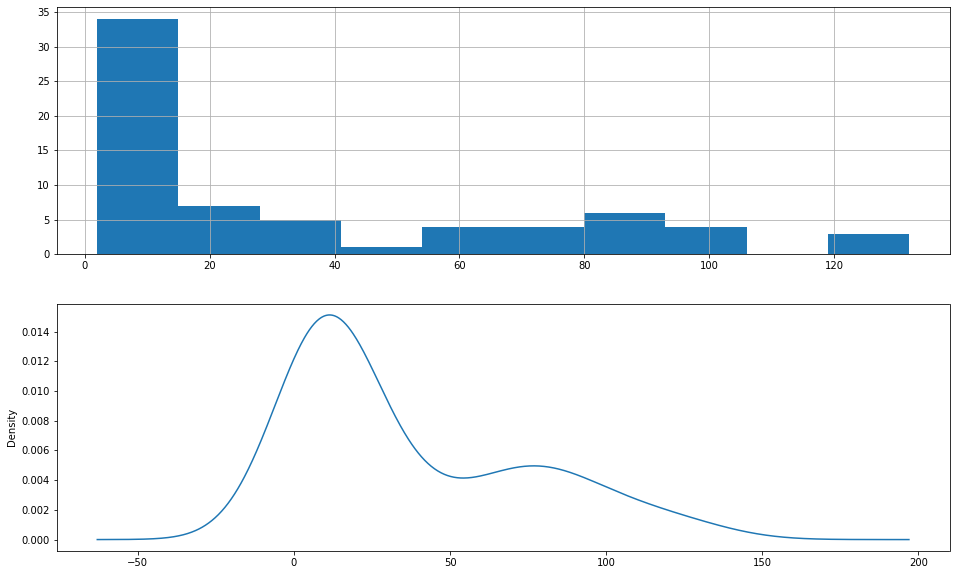

In [186]:
# Gráfico de Densidade

# Plot
plt.figure(1)

# Subplot 1
plt.subplot(211)
df_jgs_serie.casosAcumulado.hist()

# Subplot 2
plt.subplot(212)
df_jgs_serie.casosAcumulado.plot(kind = 'kde')
plt.show()

Análise:

A distribuição não é perfeitamente gaussiana (distribuição normal).
A distribuição está inclinada para a esquerda.
As transformações podem ser úteis antes da modelagem.

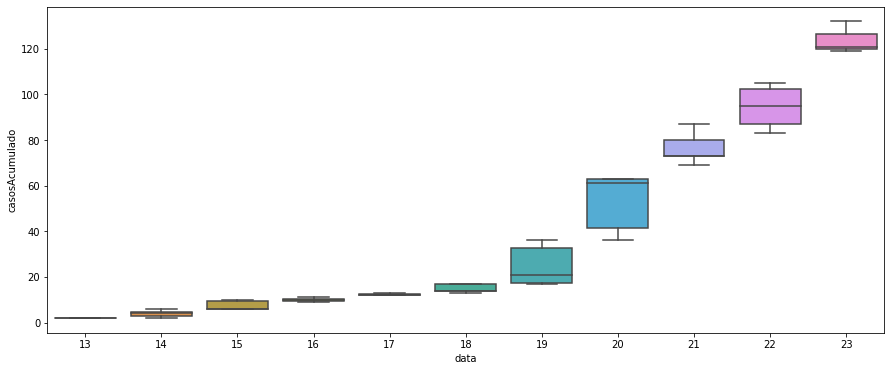

In [187]:
# Define a área de plotagem para os subplots (os boxplots)
fig, ax = plt.subplots(figsize=(15,6))

# Cria um box plot para cada semana usando o Seaborn
# Observe que estamos extraindo a semana (week) do índice da série
sns.boxplot(df_jgs_serie.casosAcumulado.index.week, df_jgs_serie.casosAcumulado, ax = ax)

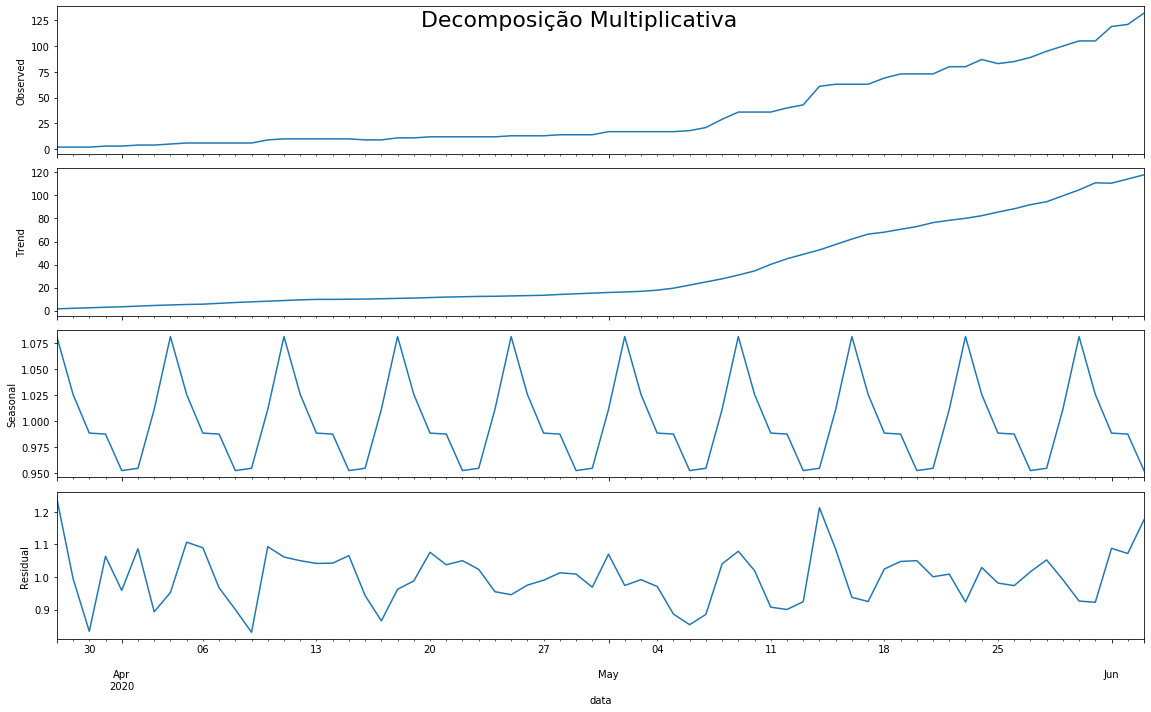

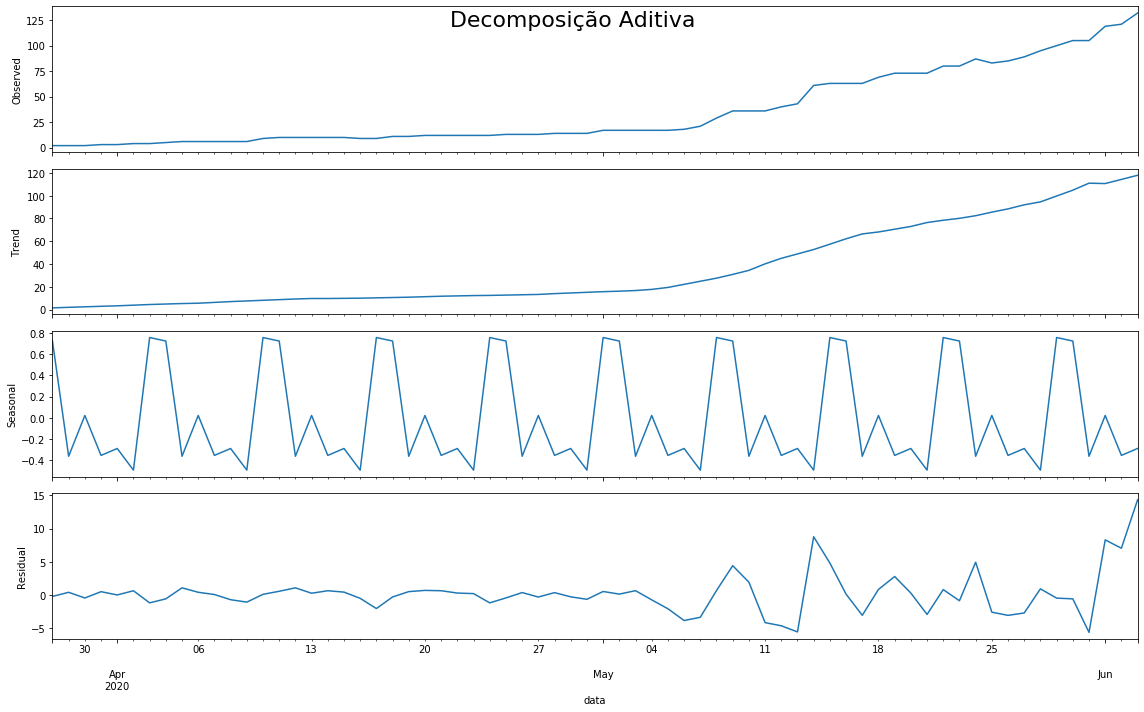

In [188]:
# Multiplicative Decomposition 
decomposicao_multiplicativa = sm.tsa.seasonal_decompose(df_jgs_serie['casosAcumulado'], model = 'multiplicative', 
                                                        extrapolate_trend = 'freq')

# Additive Decomposition
decomposicao_aditiva = sm.tsa.seasonal_decompose(df_jgs_serie['casosAcumulado'], model = 'aditive', 
                                                 extrapolate_trend = 'freq')

# Plot
plt.rcParams.update({'figure.figsize': (16,10)})
decomposicao_multiplicativa.plot().suptitle('Decomposição Multiplicativa', fontsize = 22)
decomposicao_aditiva.plot().suptitle('Decomposição Aditiva', fontsize = 22)
plt.show()

No gráfico acima podemos ver os componentes da série temporal:

1- A primeira linha do gráfico mostra os dados observados.

2- A segunda linha mostra a tendência do gráfico, que claramente é uma tendência de crescimento, ou seja, 
o númeto de casos tende a crescer ao longo do tempo.

3- A terceira linha mostra a sazonalidade. Claramente temos períodos regulares de aumento e queda.


4- A quarta linha é o componete irregular ou resíduo.

Definir extrapolate_trend = 'freq' cuida de todos os valores ausentes na tendência e nos resíduos no início da série (se existirem, claro).

Se você observar atentamente os resíduos da decomposição aditiva, ela permanece com algum padrão. 
A decomposição multiplicativa, no entanto, parece bastante aleatória, o que é bom. 
Então, idealmente, a decomposição multiplicativa deve ser preferida para essa série específica.

A saída numérica da tendência, os componentes sazonais e residuais são armazenados na própria saída decomposicao_multiplicativa.
Vamos extraí-los e colocá-los em uma tabela de dados.

In [189]:
# Extrair os componentes
# Valores reais = Produto de (sazonal * tendência * resíduo)

# Concatena o resultado da decomposição da série
dados_serie_reconstruida = pd.concat([decomposicao_multiplicativa.seasonal, 
                                      decomposicao_multiplicativa.trend, 
                                      decomposicao_multiplicativa.resid, 
                                      decomposicao_multiplicativa.observed], axis = 1)

# Define o nome das colunas
dados_serie_reconstruida.columns = ['Sazonalidade', 'Tendência', 'Resíduos', 'Valores_Observados']

# Mostra o resultado
dados_serie_reconstruida

,Sazonalidade,Tendência,Resíduos,Valores_Observados
data,,,,
2020-03-28,1.081206,1.489796,1.241637,2
2020-03-29,1.025526,1.959184,0.995425,2
2020-03-30,0.988269,2.428571,0.833305,2
2020-03-31,0.987324,2.857143,1.063481,3
2020-04-01,0.952201,3.285714,0.958876,3
...,...,...,...,...
2020-05-30,1.081206,104.857143,0.926153,105
2020-05-31,1.025526,111.000000,0.922401,105
2020-06-01,0.988269,110.673469,1.087999,119


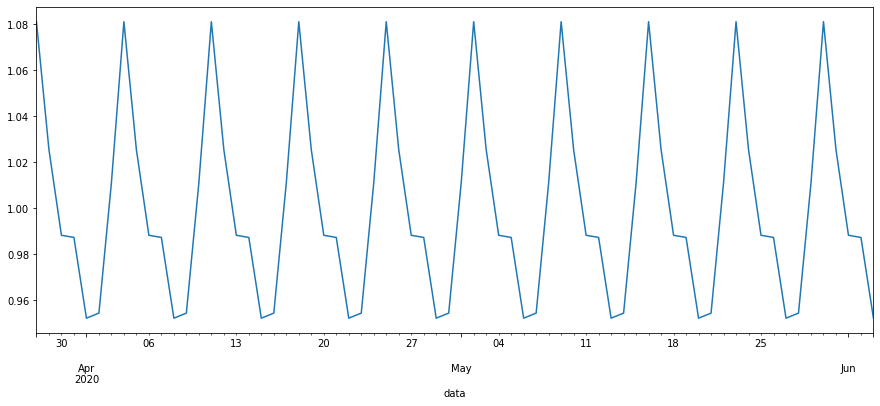

In [190]:
# Plot da série temporal
dados_serie_reconstruida['Sazonalidade'].plot(figsize = (15, 6))
plt.show()

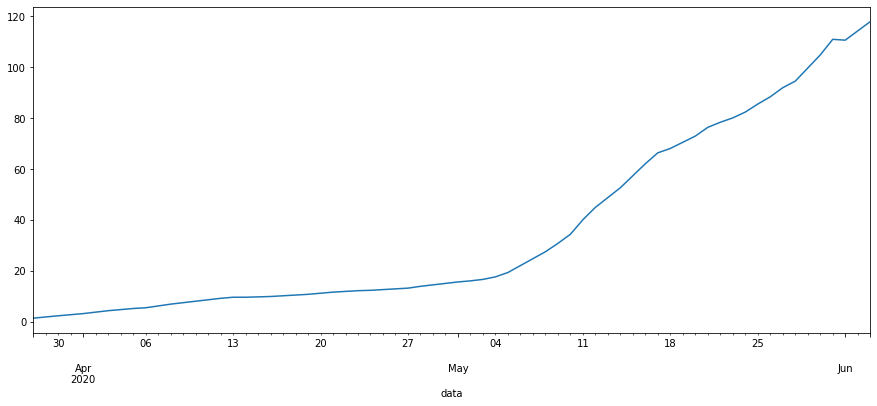

In [191]:
# Plot da série temporal
dados_serie_reconstruida['Tendência'].plot(figsize = (15, 6))
plt.show()

In [192]:
#criar data frame apenas com os casos acumulados e data para fazer média móvel

df_jgs_casos = df_jgs[['casosAcumulado','data']].copy()


In [193]:
df_jgs_casos

,casosAcumulado,data
127091,2,2020-03-28
127092,2,2020-03-29
127093,2,2020-03-30
127094,3,2020-03-31
127095,3,2020-04-01
...,...,...
127154,105,2020-05-30
127155,105,2020-05-31
127156,119,2020-06-01
127157,121,2020-06-02


In [194]:
#conferencia
df_jgs_casos.set_index("data",inplace=True)

### TESTE DE ESTACIONARIEDADE

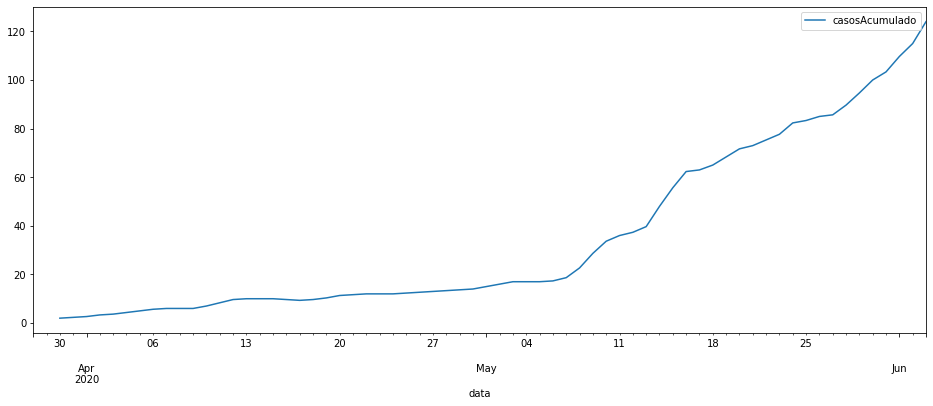

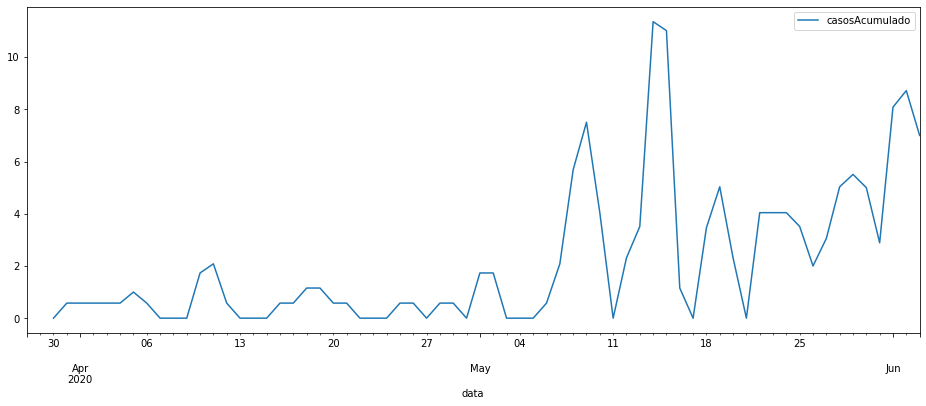

In [195]:
import matplotlib. pyplot as plt
mean = df_jgs_casos.rolling(3).mean().plot(figsize=(16,6))
std  = df_jgs_casos.rolling(3).std().plot(figsize=(16,6))

Neste gráfico podemos ver que a média móvel e o desvio padrão não são estáveis ao longo do tempo. Com isso podemos concluir que a série é não estacionária.


### Plots ACF e PACF

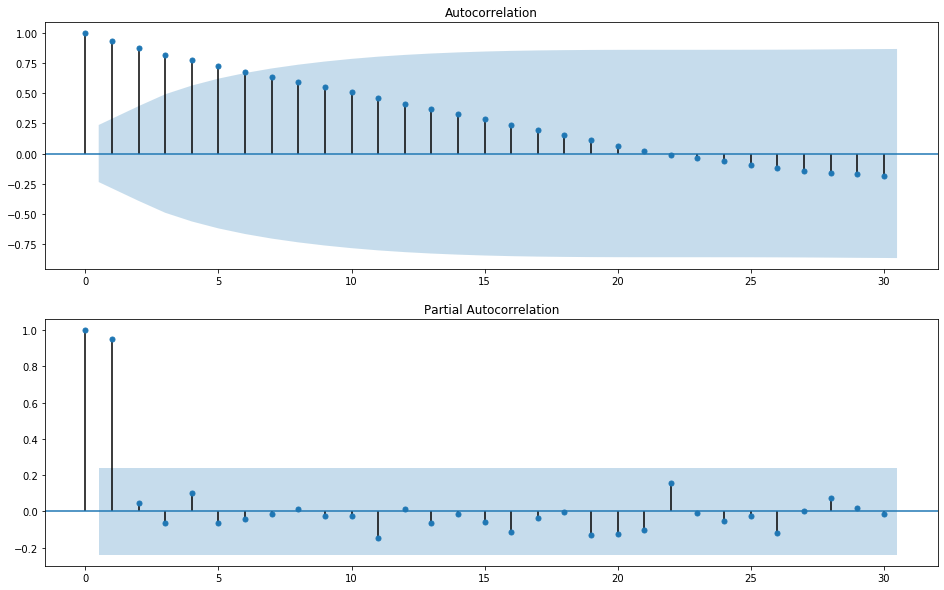

In [196]:
# Plots
plt.rcParams.update({'figure.figsize': (16,10)})

# Plot do gráfico ACF
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html
plt.subplot(211)
plot_acf(df_jgs_serie.casosAcumulado, ax = plt.gca(), lags = 30)

# Plot do gráfico PACF
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html
plt.subplot(212)
plot_pacf(df_jgs_serie.casosAcumulado, ax = plt.gca(), lags = 30)
plt.show()

Interpretação dos Gráficos:

Na série temporal analisada podemos ver vários pontos dentro da área sombreada logo podemos afirmar que não existe correlação entre a série e seus lags.


### Teste Dickey-Fuller aumentado

A intuição por trás do teste é que, se a série for integrada, o nível de atraso da série y (t-1) não fornecerá informações relevantes na previsão da mudança em y (t).
Hipótese nula: a série temporal não é estacionária.
Rejeitar a hipótese nula (ou seja, um valor-p abaixo de 0.05) indicará estacionaridade.

Podemos confirmar que a nossa série é não estacionária.

In [197]:
# Teste Dickey-Fuller

# Print
print('\nResultado do Teste Dickey-Fuller:\n')

# Teste
dfteste = adfuller(df_jgs_serie.casosAcumulado, autolag = 'AIC')

# Formatando a saída
dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                           'Valor-p',
                                           'Número de Lags Consideradas',
                                           'Número de Observações Usadas'])

# Loop por cada item da saída do teste
for key,value in dfteste[4].items():
    dfsaida['Valor Crítico (%s)'%key] = value

# Print
print (dfsaida)


Resultado do Teste Dickey-Fuller:

Estatística do Teste             2.556751
Valor-p                          0.999066
Número de Lags Consideradas     11.000000
Número de Observações Usadas    56.000000
Valor Crítico (1%)              -3.552928
Valor Crítico (5%)              -2.914731
Valor Crítico (10%)             -2.595137
dtype: float64


## Previsão de novos casos com o Facebook Prophet

### 60 dias para frente vai de aproximadamente 120 para 350 casos num pior cenário ou para 300 num cenário mais otimista

In [199]:
df_jgs_prev = df_jgs[['data','casosAcumulado']].copy()

In [200]:
df_jgs_prev=df_jgs_prev.rename(columns = {'data':'ds','casosAcumulado':'y'})

In [201]:
from fbprophet import Prophet

m = Prophet()
m.fit(df_jgs_prev)
future = m.make_future_dataframe(periods=60)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [202]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
123,2020-07-29,315.849242,282.498355,346.527558
124,2020-07-30,319.231797,285.255113,350.753383
125,2020-07-31,324.049953,289.413505,355.832540
126,2020-08-01,327.588845,291.426656,360.411075
127,2020-08-02,330.232278,294.839223,364.618424


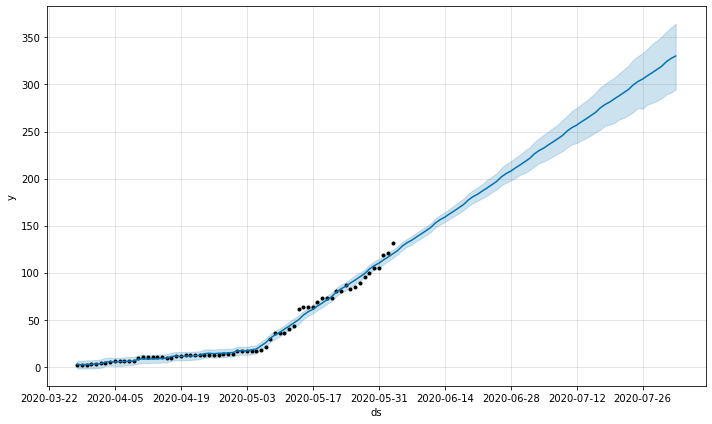

In [203]:
fig1 = m.plot(forecast)


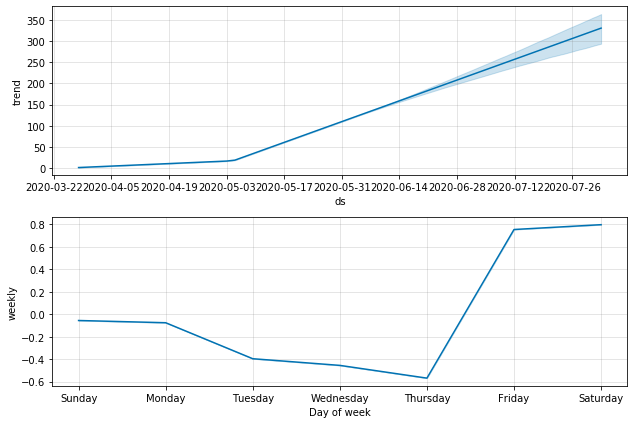

In [204]:
fig2 = m.plot_components(forecast)
